# A B test for advertising clicks

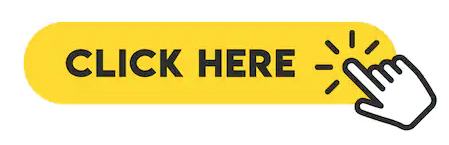

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [6]:
df = pd.read_csv('advertisement_clicks.csv')
df.head(3)

,advertisement_id,action
0,B,1
1,B,1
2,A,0


In [25]:
a = df[df['advertisement_id'] == 'A']
b = df[df['advertisement_id'] == 'B']


In [19]:
df[df['advertisement_id'] == 'B'].count()

advertisement_id    1000
action              1000
dtype: int64

In [20]:
df[df['advertisement_id'] == 'B'].count()

advertisement_id    1000
action              1000
dtype: int64

In [26]:
a.head(3)

,advertisement_id,action
2,A,0
4,A,1
5,A,0


In [27]:
b.head(2)

,advertisement_id,action
0,B,1
1,B,1


In [28]:
#drop unnecessary
a = a['action']
b = b['action']

In [30]:
a.head(3)

2    0
4    1
5    0
Name: action, dtype: int64

In [74]:
len(a),len(b)

(1000, 1000)

In [71]:
np.count_nonzero(a == 1)

304

In [72]:
np.count_nonzero(b == 1)

372

In [80]:
#percentage clicks

In [79]:
372/1000*100, 304/1000*100

(37.2, 30.4)

In [4]:
t,p =stats.ttest_ind(a,b)
t,p

(-3.2211732138019786, 0.0012971905467125246)

In [151]:
t, p = stats.ttest_ind(a, b, equal_var=False)
print("Welch's t-test:")
print("t:\t", t, "p:\t", p)

Welch's t-test:
t:	 -3.2211732138019786 p:	 0.0012972410374001632


In [75]:
#If the p-value is larger than 0.05, we cannot conclude that a significant difference exists.

In [15]:
#p is less tha .005 there is NO DIFFERENCE in the ads

# Lets do it manually

In [81]:
#t = mean a + mean  b / sqrt of std a * b / N

In [153]:
N1 = len(a)
s1_sq = a.var()
s1_sq

0.211584

In [154]:
N2 = len(b)
s2_sq = b.var()
s2_sq

0.233616

In [155]:
N1,N2

(1000, 1000)

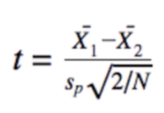# 

In [ ]:
# t = mean of A MINUS mean of B / 

In [165]:
t = (a.mean() -b.mean()) / (s *np.sqrt (2.0/N))
t

-3.221173213801978

In [181]:
#OR

In [182]:
t = (a.mean() - b.mean()) / np.sqrt(s1_sq / N1 + s2_sq / N2)
t

-3.2227850093563326

In [183]:
abs(t)

3.2227850093563326

In [184]:
p = (1 - stats.t.cdf(np.abs(t), df=df))*2
p

0.0012899517083262424

In [185]:
#USING THE STATS FUNCTION

In [186]:
t2,p2 =stats.ttest_ind(a,b)
t2,p2 #with stats

(-3.2211732138019786, 0.0012971905467125246)

In [187]:
t,p  #manual calculation

(-3.2227850093563326, 0.0012899517083262424)